# REGRESIÓN LINEAL MULTIVARIABLE

**Obtejivo**
Amplíe nuestras rutinas de modelo de regresión para admitir múltiples funciones

*   Utilice NumPy np.dot para vectorizar sus implementaciones para mayor velocidad y simplicidad
*   Reescriba las rutinas de predicción, costo y gradiente para admitir múltiples funciones



#Bibliotecas
En este laboratorio, haremos uso de:

*   **NumPy**, una biblioteca popular para computación científica
*   **Matplotlib**, una biblioteca popular para trazar datos




In [34]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

import pandas as pd

# 1. Notación
Notación utilizada en la implementación de funciones.

|Notación <img width=70/> <br />  General  <img width=70/> | Descripión<img width=350/>| Código Python |
|: ------------|: ------------------------------------------------------------||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | Vector de características de ejemplos de entrenamiento                  | `X_train` |   
|  $\mathbf{y}$  | ejemplos de entrenamiento de la variable objetivo             | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Ejemplo de entrenamiento | `X[i]`, `y[i]`|
| m | número de ejemplos de entrenamiento | `m`|
| n | número de características en un ejemplo | `n`|
|  $\mathbf{w}$  |  parámetro: pesos,                       | `w`    |
|  $b$           |  parámetro: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | El resultado de la evaluación del modelo en $\mathbf{x^{(i)}}$ parametrizados por  $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 

# 2.Problema



In [35]:
# IMPORTAR BASE DE DATOS 
datos_nuevos = pd.read_excel("datos_normalizados.xlsx")
datos_nuevos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656,-0.233507
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374,-0.332731
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398,-0.595675
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625,-0.512575
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191,-0.630403
...,...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873,-0.394746
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336,-0.624202
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688,-0.317848
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914,-0.431955


In [36]:
#X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
#y_train = np.array([460, 232, 178])

X_train = datos_nuevos.iloc[:,:10]
y_train = datos_nuevos["selling_price"]

In [37]:
X_train

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191
...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914


In [38]:
y_train

0      -0.233507
1      -0.332731
2      -0.595675
3      -0.512575
4      -0.630403
          ...   
8123   -0.394746
8124   -0.624202
8125   -0.317848
8126   -0.431955
8127   -0.431955
Name: selling_price, Length: 8128, dtype: float64

**Parámetros w y b**

In [39]:
b_init = 785.1811367994083
w_init = np.array([ 0.24251783, -0.2118112 , -0.13304738, -0.05846624, -0.15008277,
       -0.32419281, -0.00862021,  0.00996006,  0.48120436, -0.01877944])

print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (10,), b_init type: <class 'float'>


# 3. Modelo de Regresión Lineal con múltiples variables
La predicción del modelo con múltiples variables viene dada por el modelo lineal:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
o en la notación vectorial:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector **dot product(producto punto)**

Para demostrar el producto punto, implementaremos la predicción usando (1) y (2).

In [40]:
# Predicción única elemento por elemento
def predict_single_loop(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (scalar):  predicción
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b               
    return p

In [41]:
# en forma vectorial
def predict(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (scalar):  predicción
    """
    p = np.dot(x, w) + b     
    return p 

# 4. Función Costo

La ecuación para la función costo de múltiples variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
Donde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 



In [42]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo
      b (scalar)       : parámetro b del modelo
      
    Returns:
      cost (scalar): costo
    """
    m = X.shape[0]
    #print("X[",1,"]: ",X.iloc[1].values, " - b: ",b)
    cost = 0.0
    for i in range(m):
        
        f_wb_i = np.dot(X.iloc[i].values, w) + b           #(n,)(n,) = scalar
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [43]:
# Calcule y muestre el costo utilizando nuestros parámetros óptimos preseleccionados.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Costo óptimo w : {cost}')

Costo óptimo w : 308254.9170298809


# 5. Gradiente Descendiente con múltiples variables

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde, n es el número de características, parámetros $w_j$,  $b$, son actualizados simultáneamente simultaneously  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m es el número de ejemplos de entrenamiento en el conjunto de datos.

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ es la predicción del modelo,  $y^{(i)}$ es la variable objetivo


## 5.1 Compute Gradient with Multiple Variables
Se implementará la ecuación (6) y (7).
- bucle externo sobre todos los m ejemplos. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ para el ejemplo se puede calcular directamente y acumular
    - en un segundo bucle sobre todas las n características:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ es calculado para cada $w_j$.

In [44]:
def compute_gradient(X, y, w, b): 
    """
    Calcula la gradiente para la regresión lineal
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo 
      b (scalar)       : parámetro b del modelo
      
    Returns:
      dj_dw (ndarray (n,)): La gradiende del costo del parámetro w. 
      dj_db (scalar):       La gradiende del costo del parámetro b. 
    """
    m,n = X.shape           #(número de ejemplos, número de características)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X.iloc[i].values, w) + b) - y[i] 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X.iloc[i, j]
            #print("dj_dw: ",dj_dw)
        dj_db = dj_db + err
        #print("dj_db: ",dj_db)
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m     

    return dj_db, dj_dw

In [45]:
#Calcula y muestra la gradiente
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db:0.15f}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 785.181136799411661
dj_dw at initial w,b: 
 [ 0.   -0.01 -0.03 -0.01 -0.   -0.   -0.    0.    0.    0.  ]


## 5.2 Gradiente Descenndiente con múltiples variables
Se impementarará la ecuación (5) de arriba.

In [46]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
   Realiza descenso de gradiente por lotes para aprender w y b. 
   Actualiza w y b tomando num_iters pasos de gradiente con tasa de aprendizaje alfa
    
    Args:
      X (ndarray (m,n))   : Data, m ejemplos con n características
      y (ndarray (m,))    : valores objetivo
      w_in (ndarray (n,)) : valor inicial del parámetro w
      b_in (scalar)       : valor inicial del parámetro b
      cost_function       : función costo
      gradient_function   : función que calcula la gradiente
      alpha (float)       : tasa de aprendizaje alfa
      num_iters (int)     : número de iteraciones para retornar la gradiente por descenso
      
    Returns:
      w (ndarray (n,)) : valor final del parámetro w
      b (scalar)       : valor final del parámetro b
      """
    
    # Un array que almacena el costo J y los pesos w's de cada iteración para graficar
    J_history = []
    w = copy.deepcopy(w_in)  #evita modificar w global dentro de la función
    b = b_in
    
    for i in range(num_iters):

        # Calculla la gradiente 
        dj_db,dj_dw = gradient_function(X, y, w, b)  

        # actualiza los parámetros utilizando w, b, alpha y la gradiente
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # guarda el costo J en cada iteración
        if i<100000:      # previene el agotamiento de recursos
            J_history.append( cost_function(X, y, w, b))

        # Imprime el costo  cada intervalo de 10 0
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.15f}   ")
        
    return w, b, J_history #retorna los valores finales de  w,b y historial de J para plotear

# 6. Probando el modelo

In [21]:
# inicializando parámetros
initial_w = np.zeros_like(w_init)
initial_b = 0.
# configuración de parámetros para el algoritmo de la gradiente por descenso
iterations = 100
alpha = 5.0e-7
# ejecutar el algoritmo de la gradiente descendiente
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.15f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train.iloc[i].values, w_final) + b_final:0.15f}, target value: {y_train[i]}")

Iteration    0: Cost 0.499937986693401   
Iteration   10: Cost 0.499933011158565   
Iteration   20: Cost 0.499928035716214   
Iteration   30: Cost 0.499923060366345   
Iteration   40: Cost 0.499918085108953   
Iteration   50: Cost 0.499913109944045   
Iteration   60: Cost 0.499908134871609   
Iteration   70: Cost 0.499903159891646   
Iteration   80: Cost 0.499898185004159   
Iteration   90: Cost 0.499893210209139   
b,w found by gradient descent: -0.000000000000000,[ 2.07e-05  2.07e-06 -1.13e-05 -9.71e-06 -1.68e-05 -2.94e-05 -1.15e-05
 -6.29e-06  2.27e-05  3.48e-07] 
prediction: -0.000030632105513, target value: -0.233507308394426
prediction: -0.000029327782536, target value: -0.3327312612870453
prediction: -0.000107041798312, target value: -0.5956747364524864
prediction: -0.000040043281646, target value: -0.5125746759049177
prediction: -0.000066972648303, target value: -0.6304031199649031
prediction: -0.000011800885408, target value: -0.2459103025060034
prediction: -0.000080953400054,

prediction: -0.000012569181757, target value: -0.1466863496133841
prediction: 0.000029099944623, target value: 0.3060229354591913
prediction: 0.000113007387226, target value: 0.3866423971844444
prediction: -0.000072946934752, target value: -0.5063744191485401
prediction: -0.000063880872171, target value: -0.2831205251401468
prediction: -0.000060700363749, target value: -0.4195522200680871
prediction: -0.000076203963701, target value: -0.5745896464628047
prediction: -0.000157932791827, target value: -0.6576897070103733
prediction: -0.000043315614396, target value: -0.2645147936733695
prediction: -0.000015488922481, target value: -0.4542806035805039
prediction: -0.000041812906969, target value: -0.4071492259565097
prediction: 0.000002747557275, target value: 0.6036947941370491
prediction: -0.000044477531220, target value: -0.233507308394426
prediction: -0.000051831226355, target value: -0.3104058718862059
prediction: -0.000020952512155, target value: -0.295522278952313
prediction: -0.000

prediction: -0.000011300861458, target value: 0.01455257383712218
prediction: -0.000082767172059, target value: -0.6614106052438465
prediction: -0.000061249836845, target value: -0.5435821611838612
prediction: -0.000023092279638, target value: -0.5435821611838612
prediction: -0.000032345921109, target value: -0.5187761729607063
prediction: -0.000024552703510, target value: -0.1714923378365389
prediction: -0.000059618246070, target value: -0.5745896464628047
prediction: -0.000004458222610, target value: -0.233507308394426
prediction: -0.000014906172640, target value: -0.5311791670722837
prediction: -0.000049857828516, target value: -0.4567612024028193
prediction: -0.000061311989737, target value: -0.6552091081880579
prediction: -0.000007526511584, target value: -0.1962983260596938
prediction: 0.000062613683744, target value: 0.01455257383712218
prediction: -0.000022697400690, target value: -0.1962983260596938
prediction: 0.000008750773948, target value: 0.07656754439500922
prediction: -

prediction: -0.000033776059003, target value: -0.5435821611838612
prediction: 0.000004113345034, target value: -0.3079252730638904
prediction: -0.000006354535631, target value: -0.1714923378365389
prediction: -0.000017887473242, target value: -0.1466863496133841
prediction: -0.000006253969659, target value: 0.01455257383712218
prediction: -0.000012274012887, target value: -0.3203282671754679
prediction: -0.000057603253300, target value: -0.4505597053470307
prediction: -0.000015499512314, target value: -0.1466863496133841
prediction: -0.000013506262132, target value: -0.03505940260918745
prediction: -0.000098453566846, target value: -0.6862165934670014
prediction: -0.000011325729460, target value: -0.1838953319481164
prediction: -0.000057599465743, target value: -0.5063744191485401
prediction: -0.000016098375492, target value: -0.2818789854295779
prediction: -0.000009075297848, target value: -0.3426536565763072
prediction: -0.000002817905311, target value: -0.1094773672786519
prediction

prediction: 0.000157982943795, target value: 0.4486573677423315
prediction: 0.000020981472443, target value: -0.4877686876817628
prediction: 0.000138831208959, target value: -0.01645491144182134
prediction: 0.000035078717306, target value: -0.0970743731670745
prediction: 0.000116606585130, target value: 1.037799588042258
prediction: 0.000012194037415, target value: -0.2645147936733695
prediction: 0.000091825940077, target value: -0.1094773672786519
prediction: 0.000103220928765, target value: 1.037799588042258
prediction: 0.000061942247754, target value: 0.1385825149528963
prediction: 0.000048078520703, target value: -0.08467137905549708
prediction: 0.000020875387465, target value: -0.06606688788813098
prediction: 0.000119084043641, target value: -0.04746239672076486
prediction: -0.000012992351006, target value: -0.2769177877849469
prediction: -0.000045969213745, target value: -0.1342833555018067
prediction: -0.000013094786622, target value: -0.1218803613902293
prediction: -0.000054267

prediction: -0.000054328994426, target value: -0.3947462318449323
prediction: -0.000079332097094, target value: -0.6428061140764805
prediction: 0.000058397366184, target value: 0.1137765267297415
prediction: -0.000089607089377, target value: -0.6366046170206917
prediction: -0.000064161605209, target value: -0.6055971317417482
prediction: -0.000025801059076, target value: -0.4071492259565097
prediction: -0.000011513011949, target value: -0.01645491144182134
prediction: -0.000036757419849, target value: -0.4604821006362926
prediction: -0.000008276938452, target value: -0.04746239672076486
prediction: -0.000062372979915, target value: -0.568388149407016
prediction: 0.000000524733124, target value: 0.07656754439500922
prediction: -0.000066148690873, target value: -0.6415658146653227
prediction: -0.000069695132485, target value: -0.3575372495102001
prediction: 0.000004382766353, target value: 0.287417203992414
prediction: 0.000192015685161, target value: 2.570809660233226
prediction: 0.0001

prediction: -0.000040632411130, target value: -0.5001716817933403
prediction: -0.000015263888161, target value: -0.3947462318449323
prediction: 0.000005908605555, target value: -0.1094773672786519
prediction: 0.000130832055606, target value: 3.177316072289361
prediction: -0.000035541423240, target value: 0.1385825149528963
prediction: 0.000025088569394, target value: 0.008351076781333478
prediction: -0.000044664103032, target value: -0.4195522200680871
prediction: -0.000011441758224, target value: -0.07226838494391968
prediction: -0.000081829098518, target value: -0.5187761729607063
prediction: 0.000053593971578, target value: -0.2322670089832682
prediction: -0.000002669313054, target value: 0.2626124560686703
prediction: -0.000035434637451, target value: -0.4195522200680871
prediction: -0.000016830183952, target value: -0.3575372495102001
prediction: -0.000009944425666, target value: -0.4195522200680871
prediction: 0.000017378327050, target value: -0.3079252730638904
prediction: 0.000

prediction: 0.000029075069759, target value: 0.07656754439500922
prediction: -0.000034745458760, target value: -0.5435821611838612
prediction: 0.000007820234211, target value: 0.3246274266265574
prediction: -0.000053224255898, target value: -0.5187761729607063
prediction: 0.000071260347882, target value: 0.01455257383712218
prediction: 0.000173890037156, target value: 3.053286131173587
prediction: 0.000043970809751, target value: 1.068807073321202
prediction: 0.000111559513123, target value: 1.440896896668524
prediction: 0.000031231851672, target value: 0.2005974855107833
prediction: 0.000122695867941, target value: 1.812986720015846
prediction: -0.000065821447623, target value: -0.4815671906259741
prediction: -0.000012360401058, target value: -0.1094773672786519
prediction: -0.000108265110058, target value: -0.6366046170206917
prediction: -0.000068367080959, target value: -0.233507308394426
prediction: 0.000034134388890, target value: 0.2626124560686703
prediction: -0.000033342840100,

prediction: -0.000000261390351, target value: 0.07656754439500922
prediction: 0.000028282797709, target value: 0.3866423971844444
prediction: -0.000073849596232, target value: -0.6924180905227901
prediction: 0.000192015685161, target value: 2.570809660233226
prediction: 0.000189097892043, target value: 5.595899924046956
prediction: 0.000175791381261, target value: 3.177316072289361
prediction: 0.000043115418891, target value: -0.1677714396030657
prediction: 0.000149185104881, target value: 3.921495718984006
prediction: 0.000084402372857, target value: 1.688956778900072
prediction: -0.000089195651414, target value: -0.5125746759049177
prediction: 0.000047380546782, target value: 0.1261795208413189
prediction: -0.000058622025002, target value: -0.1094773672786519
prediction: -0.000006215055978, target value: 0.1385825149528963
prediction: 0.000048550677372, target value: 0.01455257383712218
prediction: -0.000031538141691, target value: -0.01645491144182134
prediction: 0.000115770470430, 

prediction: 0.000014346250430, target value: -0.338932758342834
prediction: 0.000103934257187, target value: 0.417649882463388
prediction: 0.000025948669193, target value: -0.1727326372476967
prediction: 0.000169950475047, target value: 2.402128940315773
prediction: -0.000055618327743, target value: -0.611798628797537
prediction: -0.000058345818842, target value: -0.5435821611838612
prediction: 0.000085258791234, target value: 0.6967172499738796
prediction: -0.000037218034106, target value: -0.444358208291242
prediction: 0.000100461835560, target value: -0.233507308394426
prediction: -0.000107041798312, target value: -0.6055971317417482
prediction: 0.000005772564582, target value: -0.04746239672076486
prediction: -0.000046016182307, target value: -0.4505597053470307
prediction: -0.000032389350105, target value: -0.6552091081880579
prediction: -0.000001145316523, target value: -0.1714923378365389
prediction: 0.000017381986756, target value: 0.07656754439500922
prediction: 0.000069714781

In [47]:
b_final

-1.2537406589723083e-21

## 6.1 Predicción
Una vez construido el modelo de regresión lineal utilizando los valores de w y b podemos predecir el precio de una casa con 1200 pies cuadrados, 3 habitaciones, 1 piso, 40 años.

In [48]:
nuestra_pre = predict([[0.047977, -0.440093, 1.338389, -0.889557, 0.27759, 0.385135, -0.666598, 0.999676, -0.423846, -0.035656]] 
                       , w_final, b_final)


In [49]:
print("NUESTRA PREDICCION: ", nuestra_pred)

NUESTRA PREDICCION:  [-3.06e-05]


In [50]:
print("NUESTRA PREDICCION: ", nuestra_pred*10000)

NUESTRA PREDICCION:  [-0.31]


# 7. Ploteando

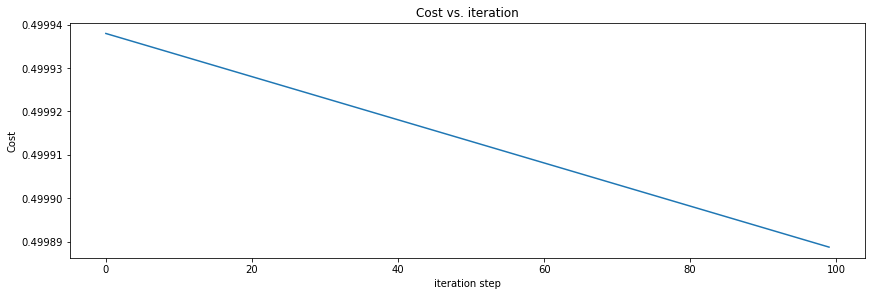

In [54]:
fig, (ax1) = plt.subplots(1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')   
plt.show()